In [86]:
import numpy as np
import matplotlib.pyplot as plt

freq = 15 * 1e6 # in MHz

c = 3e8 # in m/s
wavelength = c / freq # in m
max_depth = wavelength / 2 

B = (2 * np.pi) / wavelength

A = 0.5

max_depth, wavelength

(10.0, 20.0)

a simple test

In [87]:
angle =  (3/2)*np.pi
distance = 7.5 #max_depth 

# approach with angles
g0 = A / 2 * np.cos(angle)
g1 = - A / 2 * np.sin(angle)
g2 = - A / 2 * np.cos(angle)
g3 = A / 2 * np.sin(angle)

# approach with distances
g0_ = A / 2 * np.cos(B * distance)
g1_ = - A / 2 * np.sin(B * distance)
g2_ = - A / 2 * np.cos(B * distance)
g3_ = A / 2 * np.sin(B * distance)

a = np.arctan2(g3 - g1, g0 - g2)  
b = np.arctan2(g3_ - g1_, g0_ - g2_) 

depth = (c/2) * ( b*2 / (2 * np.pi * c/(wavelength) ) )

a == angle, b*2 == angle, depth

(False, True, 7.500000000000001)

simulation

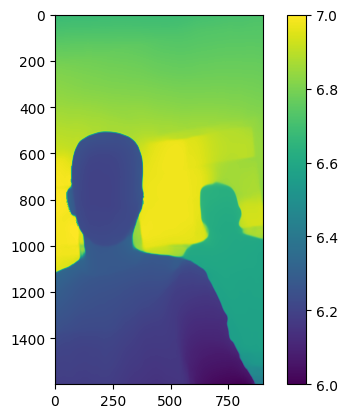

In [88]:
depth_img = np.load('../sample_data/yo_depth.npy') + 6
(nr, nc) = depth_img.shape

plt.imshow(depth_img)
plt.colorbar()

Text(0.5, 1.0, 'g3')

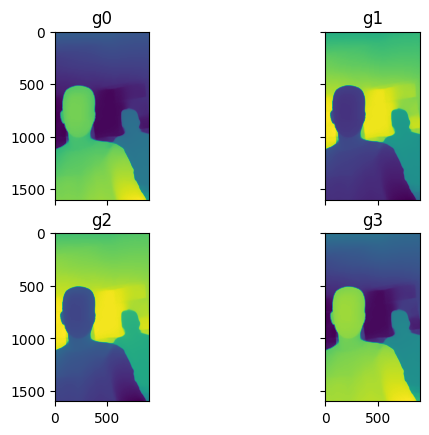

In [89]:
g0 = A / 2 * np.cos(B * depth_img)
g1 = - A / 2 * np.sin(B * depth_img)
g2 = - A / 2 * np.cos(B * depth_img)
g3 = A / 2 * np.sin(B * depth_img)

# 4 subplots sharing both x/y axes

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].imshow(g0)
axs[0, 0].set_title('g0')
axs[0, 1].imshow(g1)
axs[0, 1].set_title('g1')
axs[1, 0].imshow(g2)
axs[1, 0].set_title('g2')
axs[1, 1].imshow(g3)
axs[1, 1].set_title('g3')


7.0 6.0000005
6.9999995 6.0


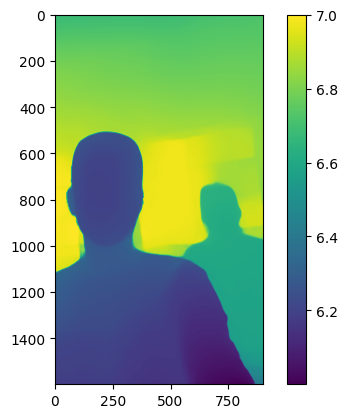

In [90]:
fases = np.arctan2(g3 - g1, g0 - g2)

#two ways to calculate the depth

depth = (c/2) * ( fases * 2 / (2 * np.pi * c/(wavelength) ) ) 
depth_ = fases/B 

plt.imshow(depth)
plt.colorbar()

print(depth.max(), depth.min())
print(depth_.max(), depth_.min())

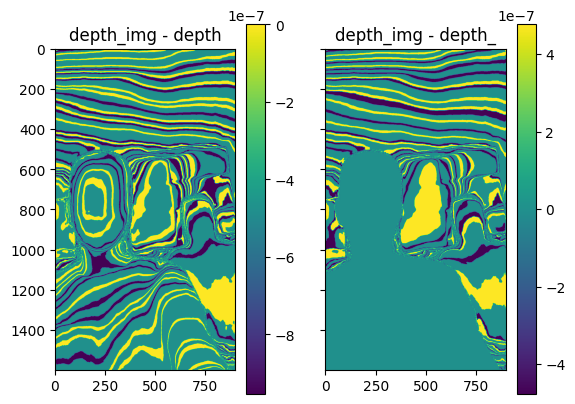

In [91]:
# show error between both approaches in a figure
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
im0 = axs[0].imshow(depth_img - depth)
axs[0].set_title('depth_img - depth')
fig.colorbar(im0, ax=axs[0])
im1 = axs[1].imshow(depth_img - depth_)
axs[1].set_title('depth_img - depth_')
fig.colorbar(im1, ax=axs[1])